In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2025 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# ML Weather Prediction Access and Plotting

Use MetPy to access machine learning weather prediction (MLWP) data in AWS S3 and plot using
the simplified plotting interface.

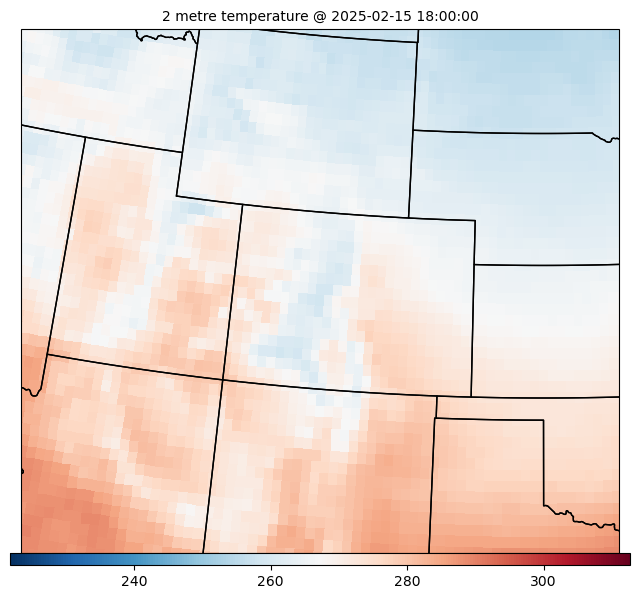

In [3]:
from datetime import datetime

from metpy.plots import MapPanel, PanelContainer, RasterPlot
from metpy.remote import MLWPArchive

###################
# Access the GraphCast forecast closest to the desired date/time
dt = datetime(2025, 2, 15, 18)
ds = MLWPArchive().get_product('graphcast', dt).access()

###################
# Plot the data using MetPy's simplified plotting interface.
raster = RasterPlot()
raster.data = ds
raster.field = 't2'
raster.time = dt
raster.colorbar = 'horizontal'
raster.colormap = 'RdBu_r'

panel = MapPanel()
panel.area = 'co'
panel.projection = 'lcc'
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [raster]
panel.title = f"{ds[raster.field].attrs['long_name']} @ {dt}"

pc = PanelContainer()
pc.size = (8, 8)
pc.panels = [panel]
pc.draw()

pc.show()